<a href="https://colab.research.google.com/github/LuizhbTavares/Conhecimentos_DataCleaning-DataWrangling/blob/main/data_cleaning_%26_data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

### Inspecionando os dados

In [ ]:
df = pd.read_csv('data.csv', encoding='Windows-1252')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Tratamento de valores nulos

In [ ]:
#Identificando quais colunas tem valores NaN
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Identificando os valores nulos da coluna Description
df[df.Description.isna()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [ ]:
#Identificando os valores nulos da coluna CustomerID
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
#Removendos valores nulos de ambas as colunas
df.dropna(subset=['Description','CustomerID'], inplace=True)

In [ ]:
#Verificando se a eliminação dos dados nulos ocorreu
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Construção de filtros para Preços unitários e Quantidades de Produtos

In [ ]:
#Filtrando o dataset para conter preços e quantidades acima de zero
df = df.query('UnitPrice > 0 and Quantity > 0')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Valores duplicados

In [ ]:
# Identificando linhas duplicadas
(
    df
    .groupby(df.columns.tolist(), dropna=False)
    .size().
    to_frame('n_duplicates').
    query('n_duplicates>1')
    .sort_values('n_duplicates',ascending=False)
    .head(5)
 )

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6

In [ ]:
# Removendo os valores duplicados
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Corrigindo os tipos das colunas do Dataset

In [ ]:
#Verificandos os tipos das colunas
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
#Corrigindo os tipos das colunas
df = df.astype({"CustomerID":"int", "InvoiceDate":"datetime64[ns]"})
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

### Tratando os outliers

<Axes: >

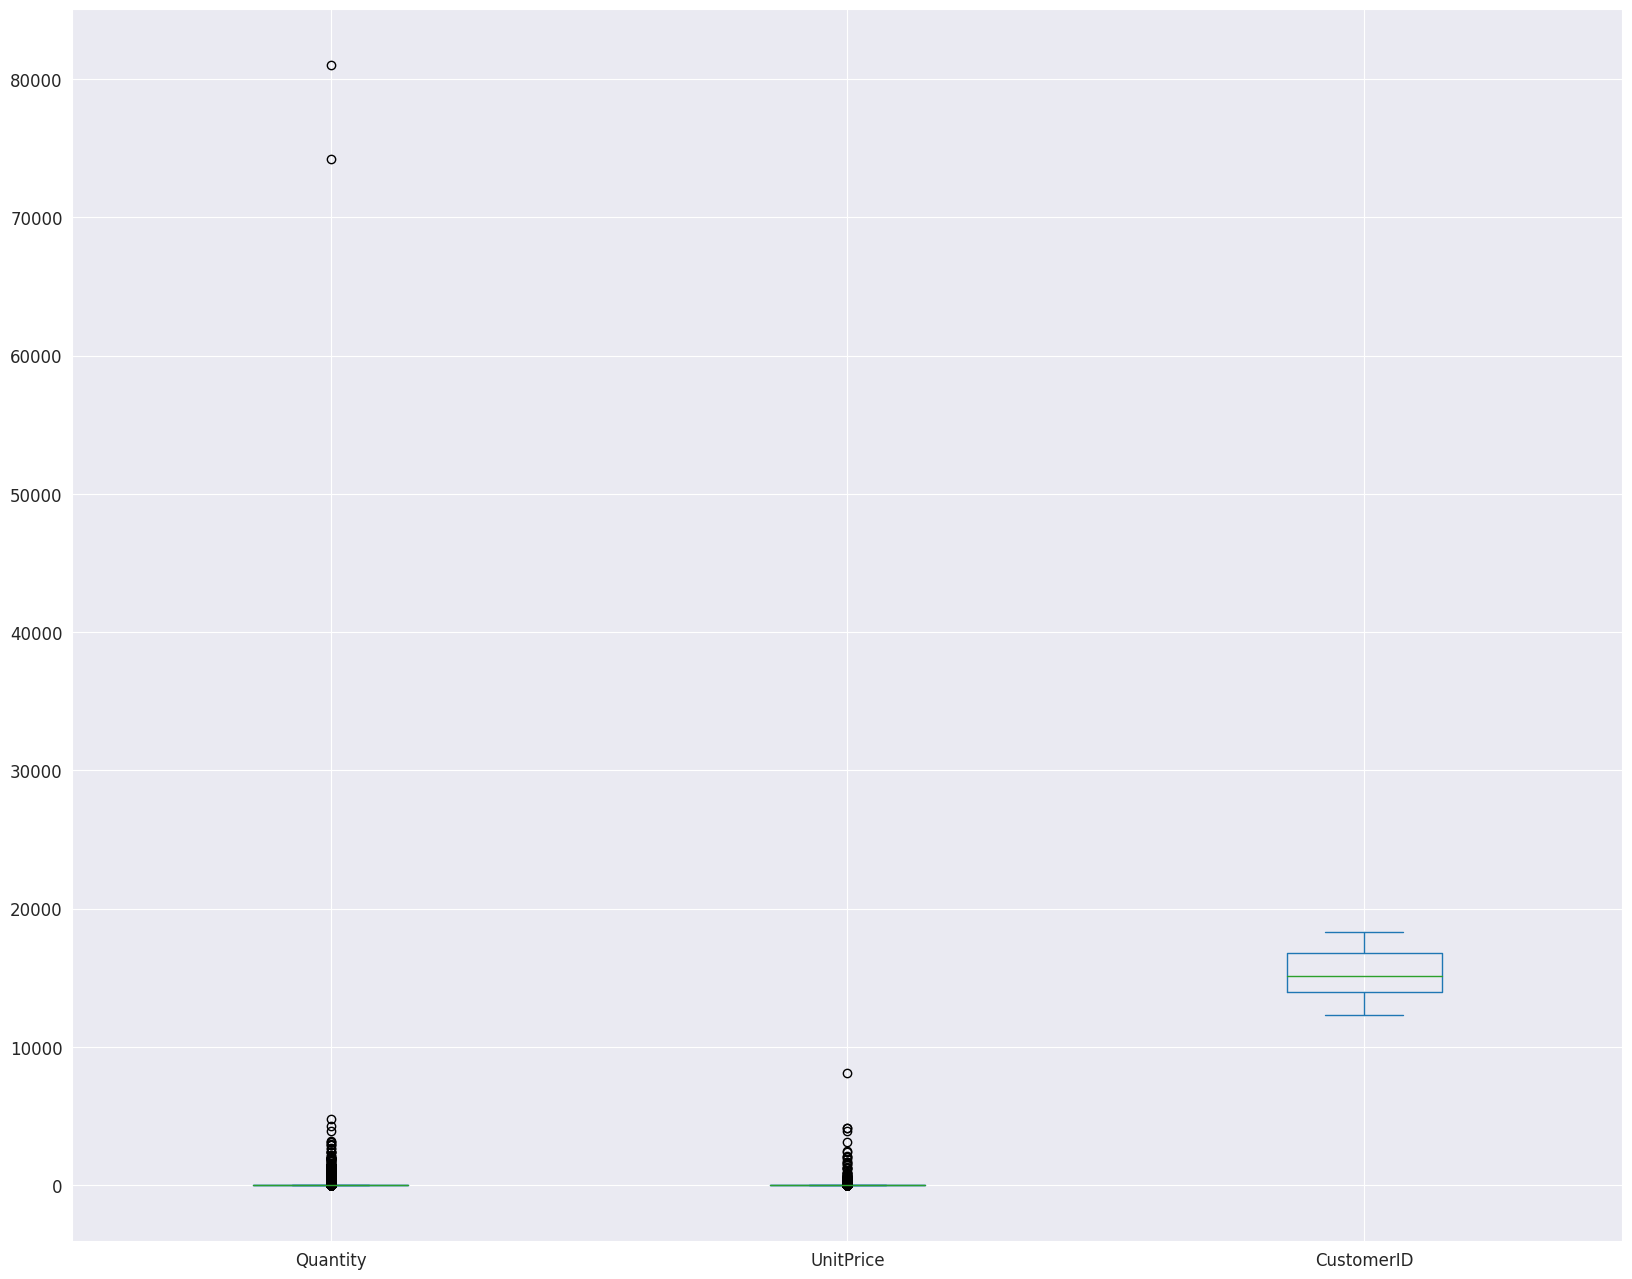

In [ ]:
#Identificando os outliers através do boxplopt
df.plot.box()

In [ ]:
#Removendo os outliers extremos
df = df.query('Quantity <= 10000 and UnitPrice <= 50000')

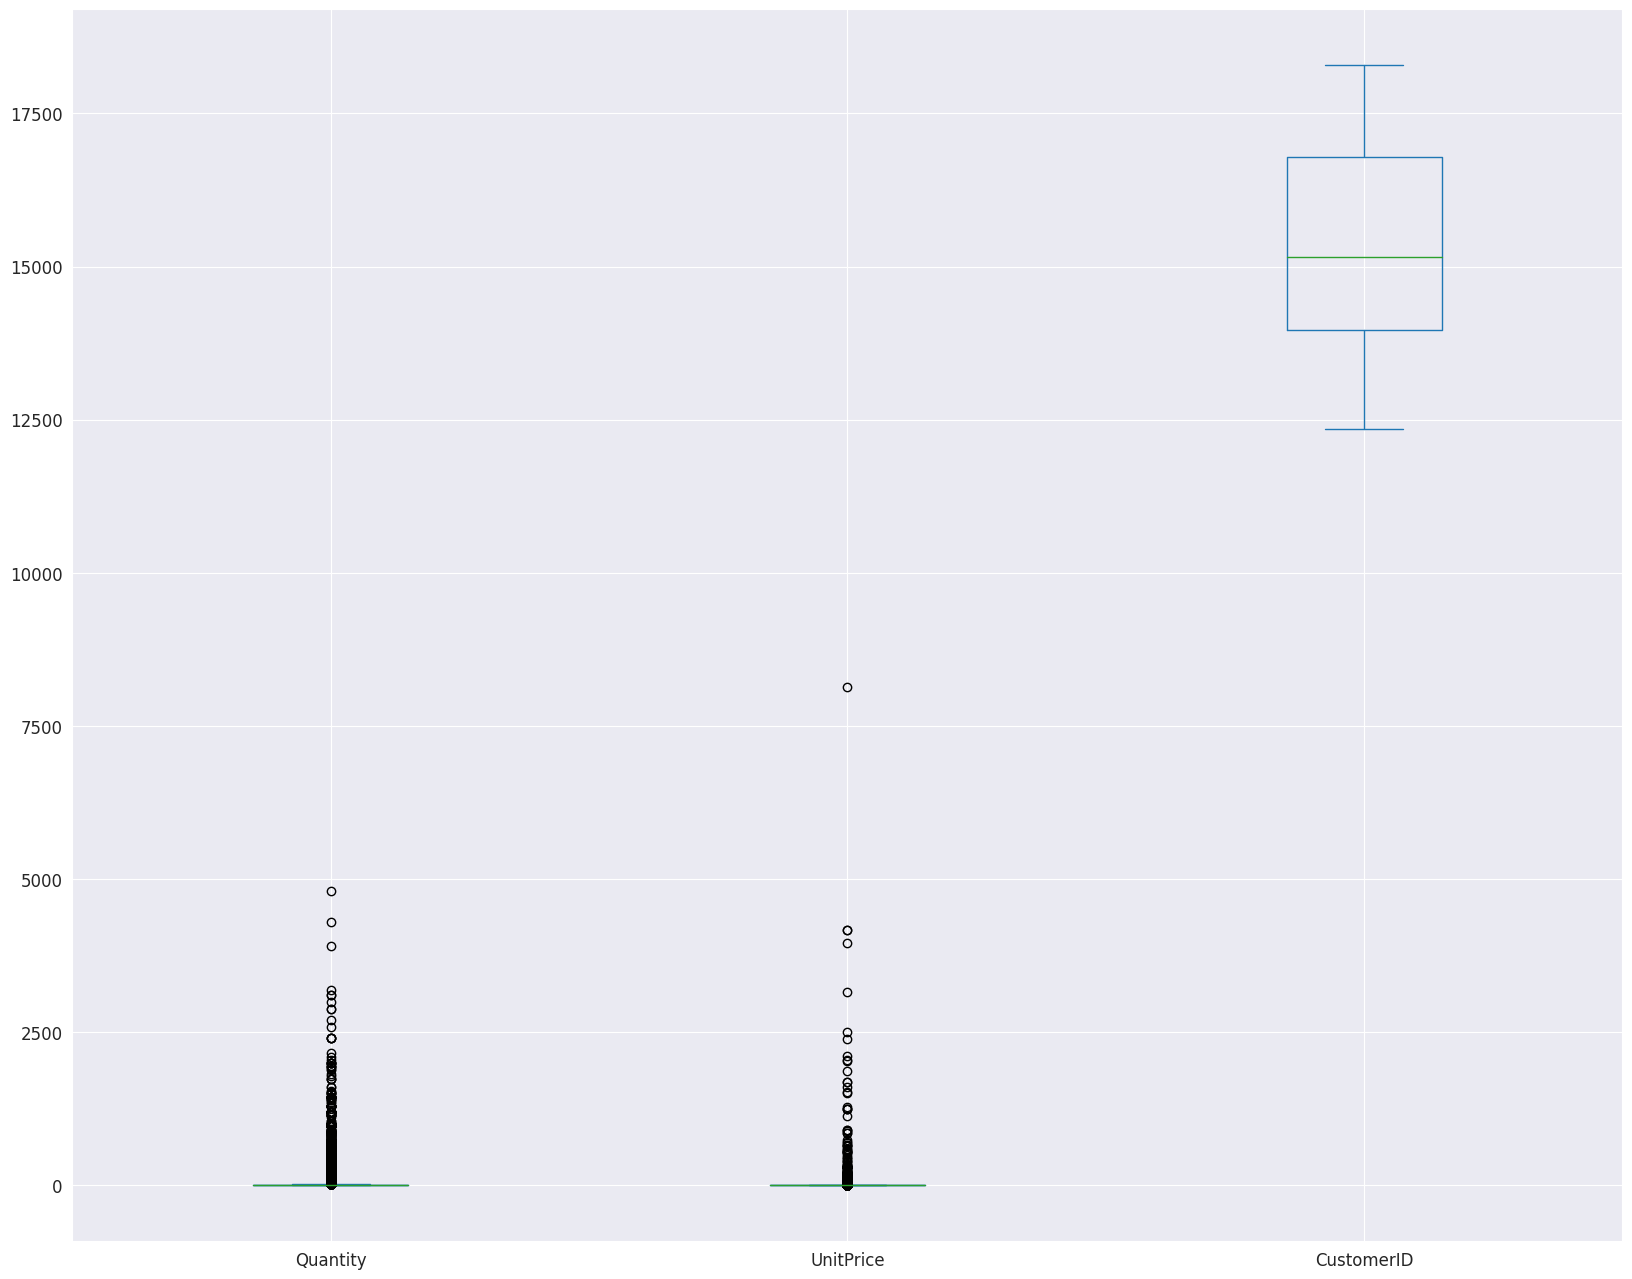

In [ ]:
#Plotando após remoção dos outliers
df.plot.box();

### Criando uma coluna adicional

In [ ]:
#Observando a tabela
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
#Criando nova coluna que é o produto das colunas Quantity e UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head(3)

<ipython-input-425-af2f55a5860f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


### Encontrando a última data

In [ ]:
#Encontrando a última data
ultima_data = df['InvoiceDate'].max()
ultima_data

Timestamp('2011-12-09 12:50:00')

In [ ]:
#Conferindo a última data
df.tail(1).sort_values(by='InvoiceDate')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


### Plotando gráficos

#### Top 10 países com maior valor em vendas

In [ ]:
# Criando o GROUPBY  para identificar o TOP10
top10_country = df.groupby(['Country'])['TotalPrice'].sum().sort_values(ascending=False).head(10)
top10_country

Country
United Kingdom    7062738.354
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64

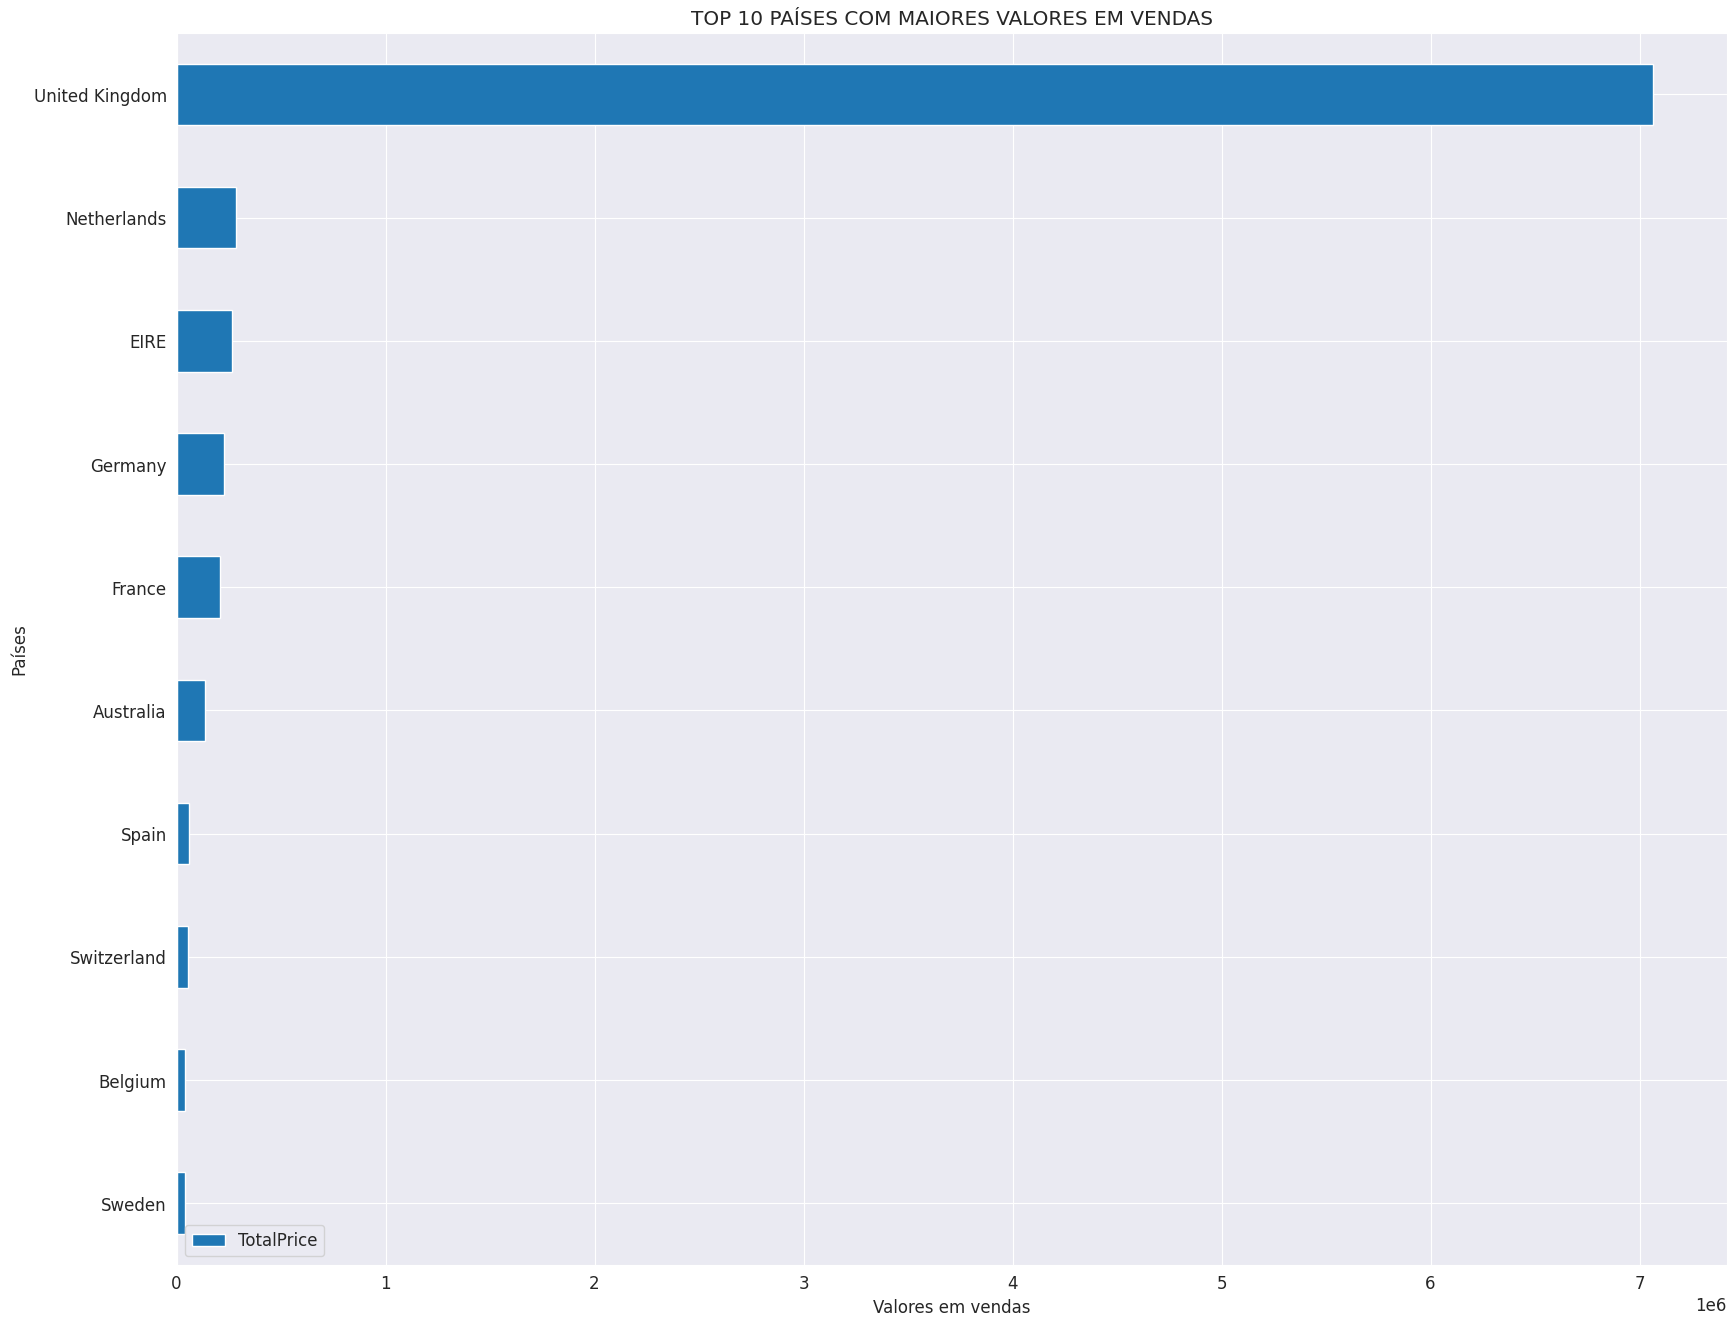

In [ ]:
#Criando o grafico de barras
pd.Series(data=top10_country).sort_values().plot.barh();
plt.title("TOP 10 PAÍSES COM MAIORES VALORES EM VENDAS")
plt.ylabel("Países")
plt.xlabel("Valores em vendas")
plt.legend()
plt.show()




#### Top 10 produtos mais vendidos

In [ ]:
# Criando o GROUPBY  para identificar o TOP10
top10_Products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top10_Products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25345
PACK OF 60 PINK PAISLEY CAKE CASES    24264
Name: Quantity, dtype: int64

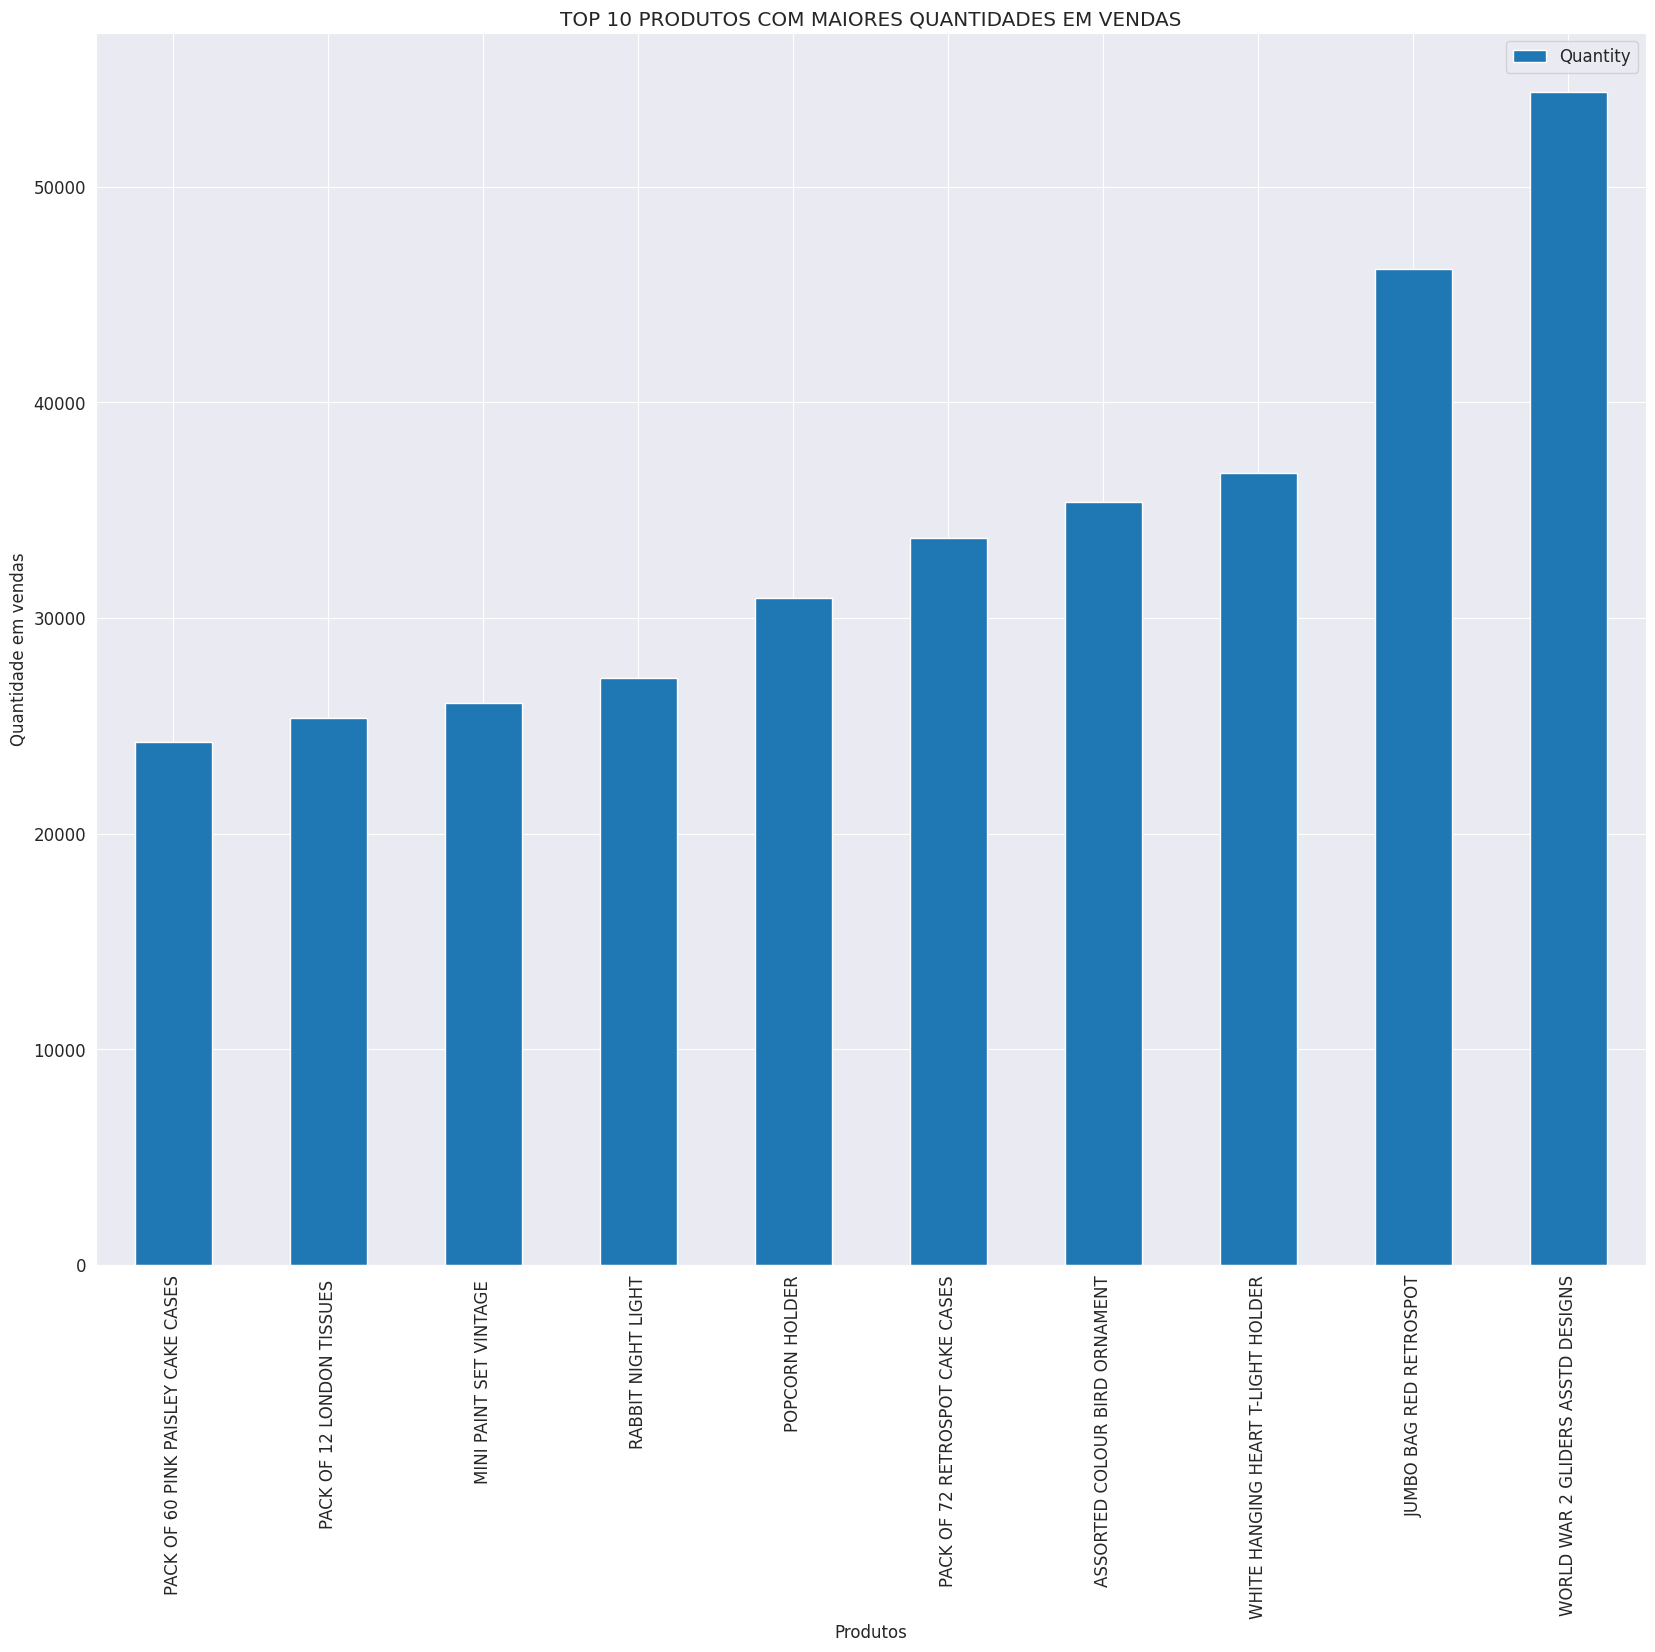

In [ ]:
#Criando o grafico de barras
pd.Series(data=top10_Products).sort_values().plot.bar();
plt.title("TOP 10 PRODUTOS COM MAIORES QUANTIDADES EM VENDAS")
plt.ylabel("Quantidade em vendas")
plt.xlabel("Produtos")
plt.legend()
plt.show()

#### Valor de venda total por mês

In [ ]:
#Agrupando por meses e fazendo a soma a cada mês
df_datas = df.groupby(df['InvoiceDate'].dt.to_period('M')).sum().reset_index()
df_datas

<ipython-input-432-7c7c46aaf432>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_datas = df.groupby(df['InvoiceDate'].dt.to_period('M')).sum().reset_index()


,InvoiceDate,Quantity,UnitPrice,CustomerID,TotalPrice
0,2010-12,312265,81935.610,406196835,572713.890
1,2011-01,274883,66963.950,321850894,492261.440
2,2011-02,265622,63185.760,305207531,447137.350
3,2011-03,348503,88563.100,412653906,595500.760
4,2011-04,292222,79005.481,345925717,469200.361
5,2011-05,373601,102128.280,431128726,678594.560
6,2011-06,363699,85274.730,416663110,661213.690
7,2011-07,369420,75919.901,410674538,600091.011
8,2011-08,398121,79423.830,412055398,645343.900
9,2011-09,544897,119053.062,610865157,952838.382


In [ ]:
# Criando o GROUPBY
vendas_mensal = df_datas.groupby('InvoiceDate')['TotalPrice'].sum()
vendas_mensal

InvoiceDate
2010-12     572713.890
2011-01     492261.440
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     349723.190
Freq: M, Name: TotalPrice, dtype: float64

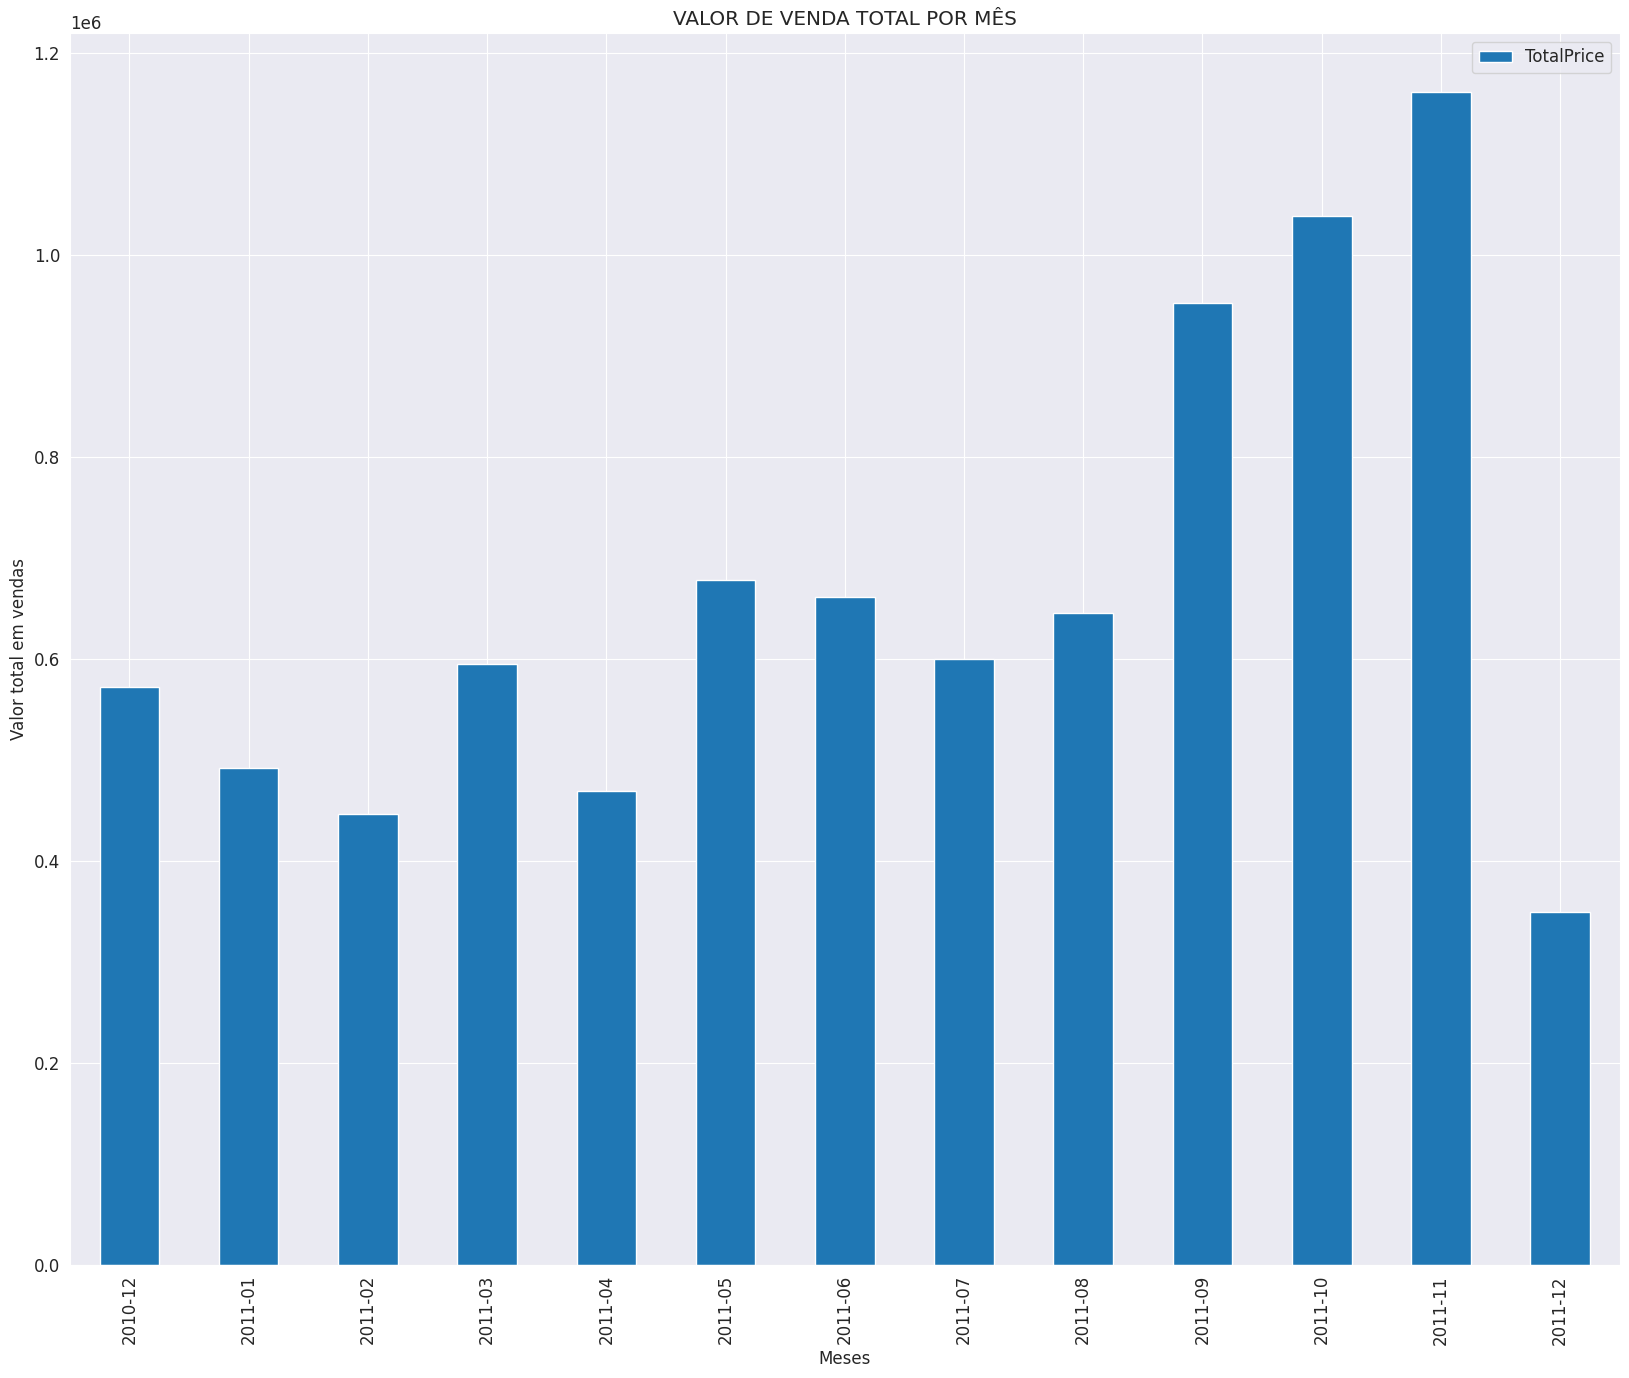

In [ ]:
pd.Series(data=vendas_mensal).plot.bar();
plt.title("VALOR DE VENDA TOTAL POR MÊS")
plt.ylabel("Valor total em vendas")
plt.xlabel("Meses")
plt.legend()
plt.show()

#### Valor de venda total por mês e por país (considere apenas os top 10)

In [ ]:
#Trabalhando com a coluna InvoiceDate para simplificar no agrupamento
df['data'] = df['InvoiceDate'].dt.to_period('M');

<ipython-input-435-44af7d42ffca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = df['InvoiceDate'].dt.to_period('M');


In [ ]:
#Verificando a mudança
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,data
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [ ]:
#Agrupando as datas e os paises
venda = df.groupby(['Country','data'])['TotalPrice'].sum().sort_values(ascending=False).head(10)
venda

Country         data   
United Kingdom  2011-11    980645.750
                2011-10    824766.220
                2011-09    796780.272
                2011-05    551568.820
                2011-06    524915.480
                2010-12    498661.850
                2011-08    498453.320
                2011-07    485612.251
                2011-03    467198.590
                2011-04    409559.141
Name: TotalPrice, dtype: float64

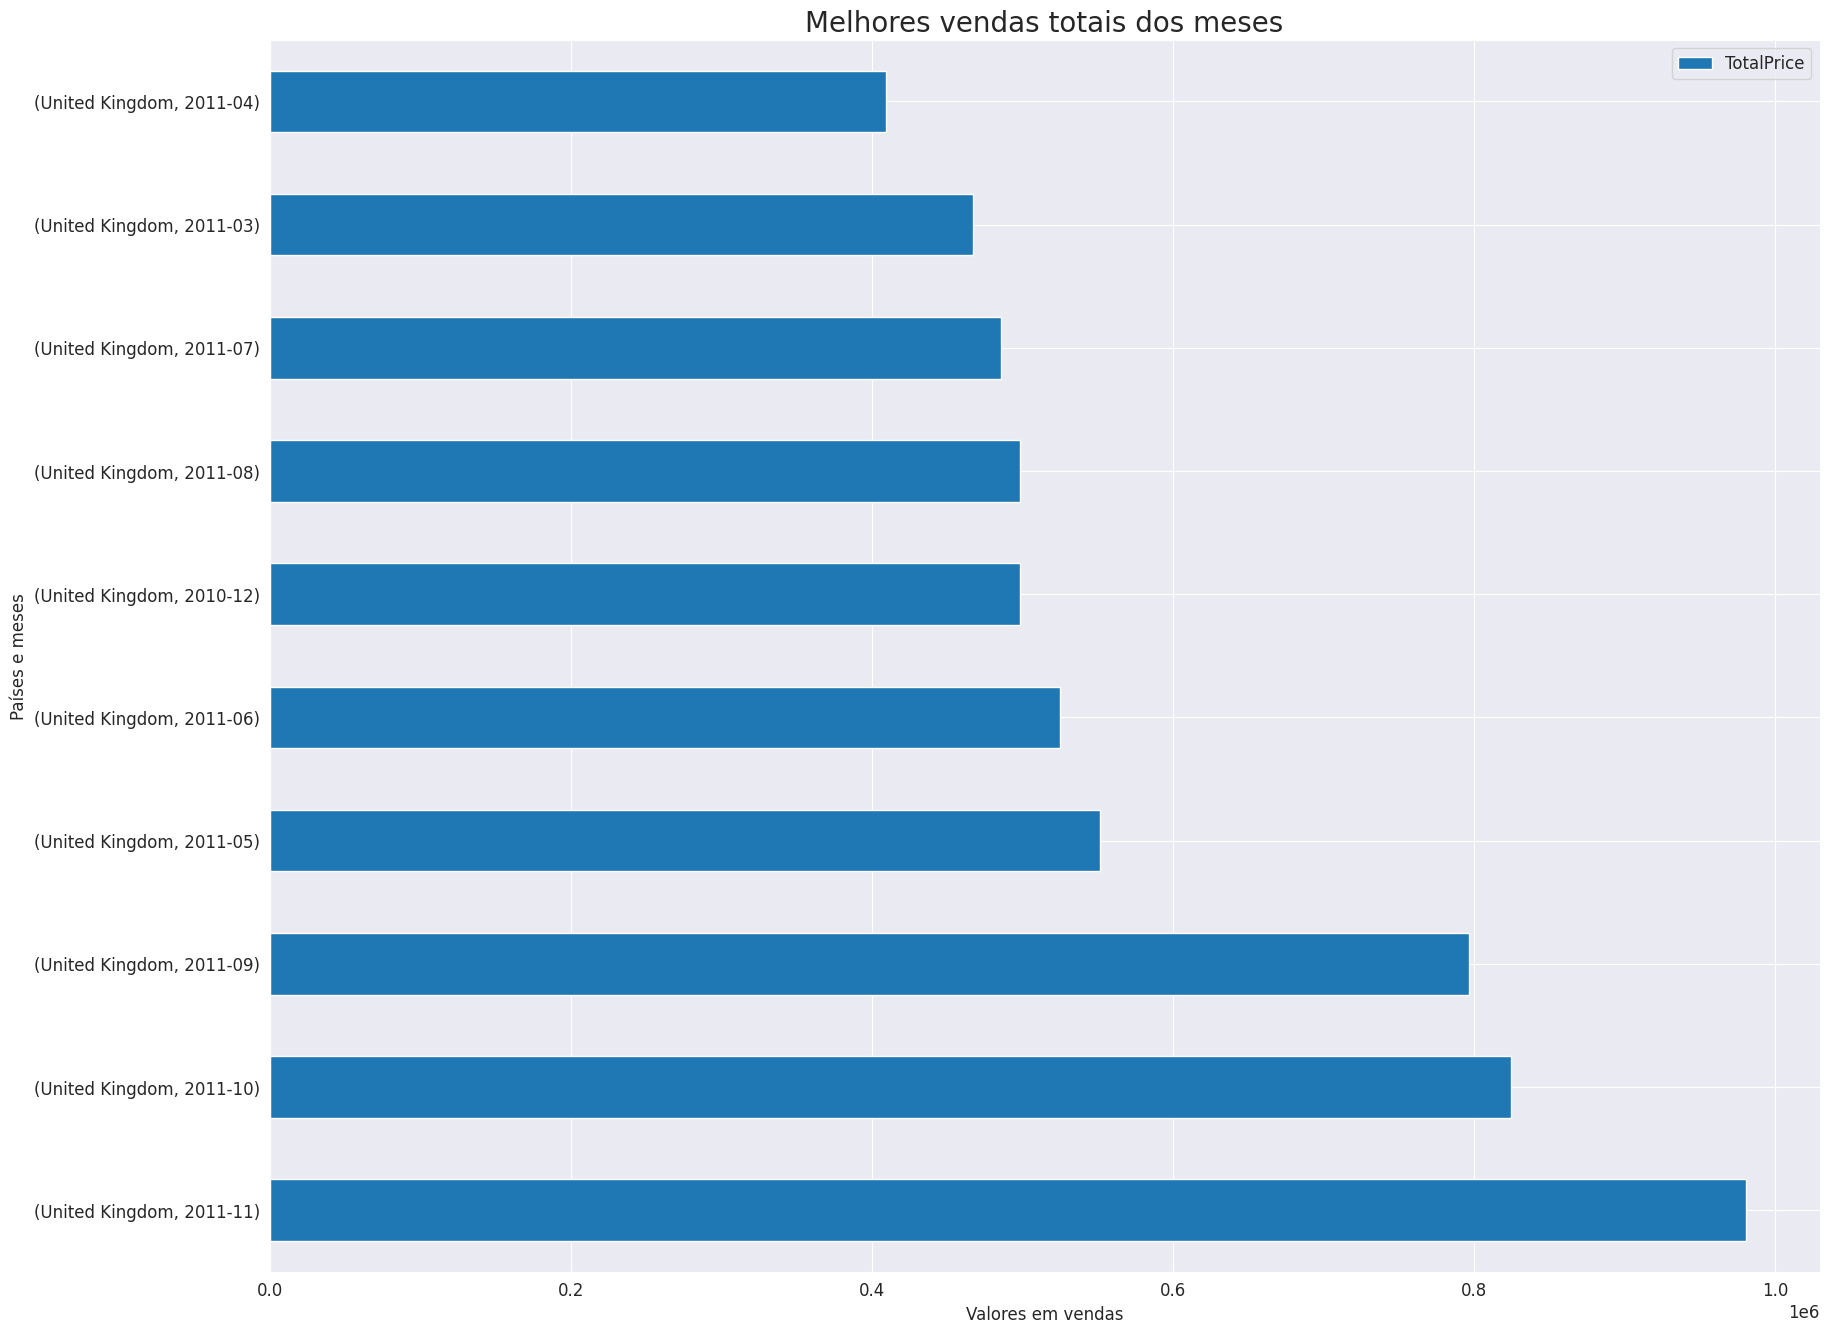

In [ ]:
venda.plot(kind="barh",stacked=False)
plt.title("Melhores vendas totais dos meses", size=20)
plt.ylabel("Países e meses")
plt.xlabel("Valores em vendas")
plt.legend()
plt.show()

### Cálculo do RFM

#### Recência

In [ ]:
#Dropando coluna desnecessária
df = df.drop('data', axis=1)
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Criando a tabela de recência
recencia = df.groupby('CustomerID')['InvoiceDate'].max().reset_index() # Ultima compra de cada Cliente
recencia.columns = ['CustomerID', 'Data_ultima_compra']
recencia

,CustomerID,Data_ultima_compra
0,12347,2011-12-07 15:52:00
1,12348,2011-09-25 13:13:00
2,12349,2011-11-21 09:51:00
3,12350,2011-02-02 16:01:00
4,12352,2011-11-03 14:37:00
...,...,...
4332,18280,2011-03-07 09:52:00
4333,18281,2011-06-12 10:53:00
4334,18282,2011-12-02 11:43:00
4335,18283,2011-12-06 12:02:00


In [ ]:
# Calculando a recência
recencia['Recencia'] = (ultima_data - recencia['Data_ultima_compra']).dt.days
recencia

,CustomerID,Data_ultima_compra,Recencia
0,12347,2011-12-07 15:52:00,1
1,12348,2011-09-25 13:13:00,74
2,12349,2011-11-21 09:51:00,18
3,12350,2011-02-02 16:01:00,309
4,12352,2011-11-03 14:37:00,35
...,...,...,...
4332,18280,2011-03-07 09:52:00,277
4333,18281,2011-06-12 10:53:00,180
4334,18282,2011-12-02 11:43:00,7
4335,18283,2011-12-06 12:02:00,3


#### Frequência

In [ ]:
#Criando a tabela Frequência
frequencia = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequencia.columns = ['CustomerID', 'Frequencia']
frequencia

,CustomerID,Frequencia
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,8
...,...,...
4332,18280,1
4333,18281,1
4334,18282,2
4335,18283,16


#### Tickt médio

In [ ]:
#Criando a tabela de Tickt médio
monetaridade = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetaridade.columns = ['CustomerID', 'Tickt médio']
monetaridade

,CustomerID,Tickt médio
0,12347,4310.00
1,12348,1797.24
2,12349,1757.55
3,12350,334.40
4,12352,2506.04
...,...,...
4332,18280,180.60
4333,18281,80.82
4334,18282,178.05
4335,18283,2094.88


#### Agrupando as tabelas

In [ ]:
rfm = recencia.merge(frequencia, on='CustomerID').merge(monetaridade, on='CustomerID')
rfm

,CustomerID,Data_ultima_compra,Recencia,Frequencia,Tickt médio
0,12347,2011-12-07 15:52:00,1,7,4310.00
1,12348,2011-09-25 13:13:00,74,4,1797.24
2,12349,2011-11-21 09:51:00,18,1,1757.55
3,12350,2011-02-02 16:01:00,309,1,334.40
4,12352,2011-11-03 14:37:00,35,8,2506.04
...,...,...,...,...,...
4332,18280,2011-03-07 09:52:00,277,1,180.60
4333,18281,2011-06-12 10:53:00,180,1,80.82
4334,18282,2011-12-02 11:43:00,7,2,178.05
4335,18283,2011-12-06 12:02:00,3,16,2094.88
